In [1]:
import pandas as pd

In [2]:
deal=pd.read_csv('eggs.csv')
deal

,Eggs_Sold
0,300.0
1,450.0
2,538.0
3,756.0
4,875.0
...,...
129,19075.0
130,19220.6
131,19366.2
132,19511.8


In [4]:
deal['forecasted_sales']=deal.Eggs_Sold.rolling(2).mean()
deal

,Eggs_Sold,forecasted_sales
0,300.0,NaN
1,450.0,375.0
2,538.0,494.0
3,756.0,647.0
4,875.0,815.5
...,...,...
129,19075.0,19002.2
130,19220.6,19147.8
131,19366.2,19293.4
132,19511.8,19439.0


In [5]:
deal.loc[0]=[300,375]
deal

,Eggs_Sold,forecasted_sales
0,300.0,375.0
1,450.0,375.0
2,538.0,494.0
3,756.0,647.0
4,875.0,815.5
...,...,...
129,19075.0,19002.2
130,19220.6,19147.8
131,19366.2,19293.4
132,19511.8,19439.0


In [6]:
deal=deal.rename(columns={'Eggs_Sold': 'actual_sales'})
deal

,actual_sales,forecasted_sales
0,300.0,375.0
1,450.0,375.0
2,538.0,494.0
3,756.0,647.0
4,875.0,815.5
...,...,...
129,19075.0,19002.2
130,19220.6,19147.8
131,19366.2,19293.4
132,19511.8,19439.0


In [7]:
import matplotlib.pyplot as plt

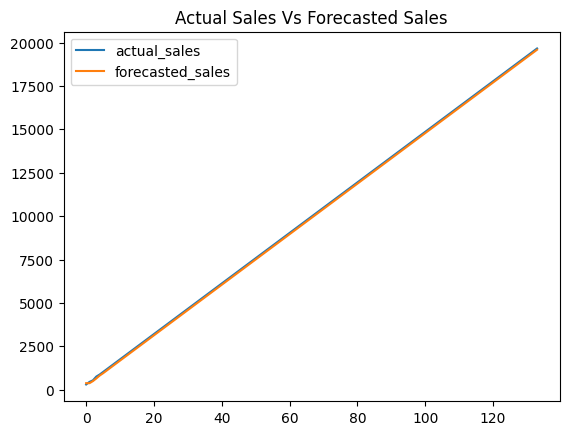

In [8]:
deal.plot(y=['actual_sales','forecasted_sales'])
plt.title("Actual Sales Vs Forecasted Sales")
plt.show()

In [10]:
deal['Yt-Ft'] = deal['actual_sales'] - deal['forecasted_sales']
deal

,actual_sales,forecasted_sales,Yt-Ft
0,300.0,375.0,-75.0
1,450.0,375.0,75.0
2,538.0,494.0,44.0
3,756.0,647.0,109.0
4,875.0,815.5,59.5
...,...,...,...
129,19075.0,19002.2,72.8
130,19220.6,19147.8,72.8
131,19366.2,19293.4,72.8
132,19511.8,19439.0,72.8


In [11]:
deal['|Yt-Ft|'] = deal['Yt-Ft'].abs()
deal

,actual_sales,forecasted_sales,Yt-Ft,|Yt-Ft|
0,300.0,375.0,-75.0,75.0
1,450.0,375.0,75.0,75.0
2,538.0,494.0,44.0,44.0
3,756.0,647.0,109.0,109.0
4,875.0,815.5,59.5,59.5
...,...,...,...,...
129,19075.0,19002.2,72.8,72.8
130,19220.6,19147.8,72.8,72.8
131,19366.2,19293.4,72.8,72.8
132,19511.8,19439.0,72.8,72.8


In [12]:
deal['|Yt-Ft|/Yt'] = deal['|Yt-Ft|'] / deal['actual_sales']
deal

,actual_sales,forecasted_sales,Yt-Ft,|Yt-Ft|,|Yt-Ft|/Yt
0,300.0,375.0,-75.0,75.0,0.250000
1,450.0,375.0,75.0,75.0,0.166667
2,538.0,494.0,44.0,44.0,0.081784
3,756.0,647.0,109.0,109.0,0.144180
4,875.0,815.5,59.5,59.5,0.068000
...,...,...,...,...,...
129,19075.0,19002.2,72.8,72.8,0.003817
130,19220.6,19147.8,72.8,72.8,0.003788
131,19366.2,19293.4,72.8,72.8,0.003759
132,19511.8,19439.0,72.8,72.8,0.003731


In [14]:
deal.loc[:, '|Yt-Ft|'].mean()

72.78880597014916

In [15]:
deal.loc[:, '|Yt-Ft|/Yt'].mean()

0.016627041491364476

In [17]:
m= deal['Yt-Ft']**2
m

0       5625.00
1       5625.00
2       1936.00
3      11881.00
4       3540.25
         ...   
129     5299.84
130     5299.84
131     5299.84
132     5299.84
133     5299.84
Name: Yt-Ft, Length: 134, dtype: float64

In [18]:
m.mean()#MSE

5315.571716417896